<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Champagne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv

--2022-04-29 05:54:44--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1596 (1.6K) [text/plain]
Saving to: ‘monthly_champagne_sales.csv’

monthly_champagne_s 100%[===================>]   1.56K  --.-KB/s    in 0s      

2022-04-29 05:54:44 (24.5 MB/s) - ‘monthly_champagne_sales.csv’ saved [1596/1596]



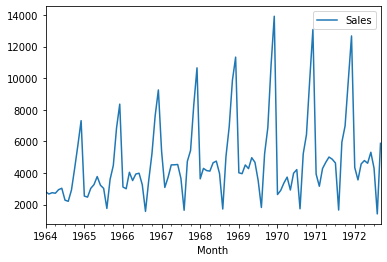

In [27]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
df = read_csv('monthly_champagne_sales.csv', index_col='Month', parse_dates=True)
# plot the time series
df.plot()
pyplot.show()

In [2]:
print(df.shape)

(108, 2)


Challenge: Use last 47 months of data as test and get RMSE value less than 921.110

In [28]:

train = df[:-47]
test = df[-47:]
print("Full data shape is "+ str(df.shape))
print("Train data shape is "+ str(train.shape))
print("Test data shape is "+ str(test.shape))

Full data shape is (105, 1)
Train data shape is (58, 1)
Test data shape is (47, 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

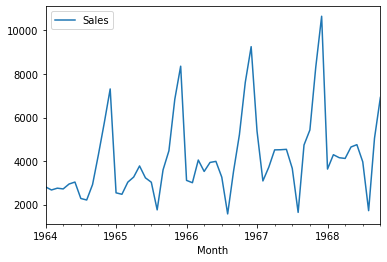

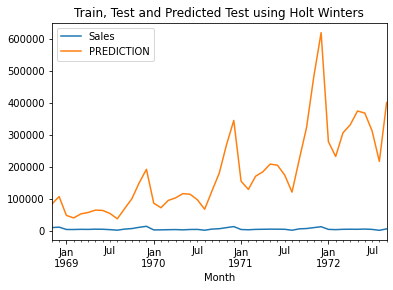

In [29]:
import pandas as pd
import numpy as np
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(47)
train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [30]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

Mean Absolute Error = 177512.28435616413
Mean Squared Error = 47586994415.69776
Root Mean Squared Error = 218144.43475756553
Mean Absolute Percentage Error = 4299.289700114528


In [15]:
!pip install tbats

In [31]:
from pandas._libs.lib import to_object_array_tuples
from tbats import TBATS
import numpy as np
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=True,  # shall try only models without ARMA
    use_box_cox=True # will not use Box-Cox
)
model = estimator.fit(train)

Mean Absolute Error = 682.4765341048537
Mean Squared Error = 839325.8286071263
Root Mean Squared Error = 916.1472745182001
Mean Absolute Percentage Error = 60.534535868126085


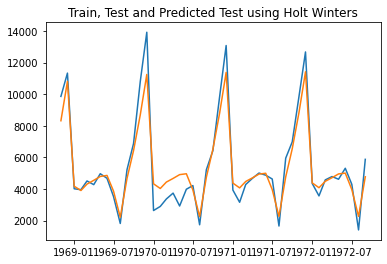

In [32]:
import pandas as pd
test_predictions = model.forecast(steps=47)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')


test_predictions=pd.DataFrame(test_predictions)
new_index = test.index
test_predictions=test_predictions.set_index(new_index)
test_predictions.columns=['SALES']
plt.plot(test.index, test,test_predictions.index,test_predictions)
plt.title('Train, Test and Predicted Test using Holt Winters');